In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/content/cardiovascular_risk.csv'
cardio_df = pd.read_csv(data_path)

Check for sample data

In [3]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Check the statistics

In [4]:
cardio_df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


check the data info

In [5]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Check for null values in attributes

In [6]:
cardio_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

## Exploratory Data Analysis

Analyzing number of patients at each age

Text(0.5, 1.0, 'Number of Patients at Each Age')

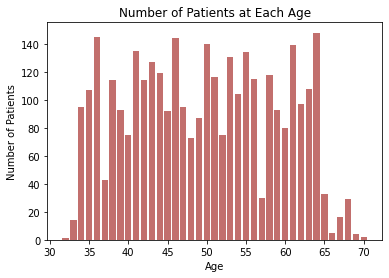

In [7]:
#See the distribution of ages and verify all of them make sense
age_unique = cardio_df['age'].unique()
age_counts = cardio_df['age'].value_counts()

#Plot ages in series vs count of each
plt.bar(age_unique, age_counts, color='#c26f6d')
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Number of Patients at Each Age")

Number of patients at different education level

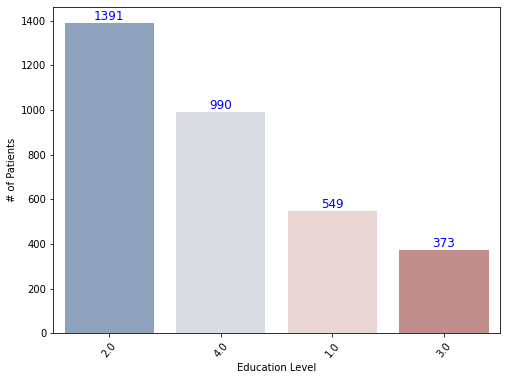

In [8]:
edu_lvl = cardio_df['education'].unique()

#Create Figure 
fig, ax = plt.subplots(figsize = (8, 6))

#Create Plot
ax = sns.countplot(x='education', data=cardio_df, palette='vlag')
ax.set(xlabel='Education Level', ylabel='# of Patients')
ax.set_xticklabels(edu_lvl, rotation=50)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')


Number of Cigarettes Smoked Per Day - All Patients

Text(0.5, 1.0, 'Number of Cigarettes Smoked Per Day - All Patients')

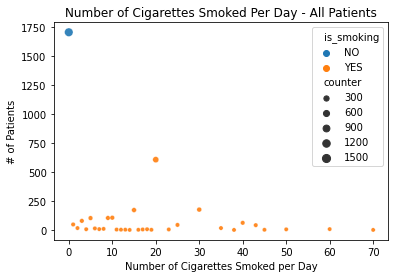

In [9]:
#Define Dataframe by copying original, dropping null values, creating a blank entry, grouping, and resetting index
df_smoking = cardio_df[['is_smoking','cigsPerDay']].copy()
df_smoking.cigsPerDay = df_smoking.cigsPerDay.dropna()
df_smoking['counter'] = 1
dfsmkplt = df_smoking.groupby(['cigsPerDay','is_smoking']).count().reset_index()

#Create frame without smokers
dfsmkplt_ns =dfsmkplt[dfsmkplt.is_smoking == 'YES']

#Create Plot
ax = sns.scatterplot(x=dfsmkplt.cigsPerDay, y=dfsmkplt.counter, hue=dfsmkplt.is_smoking, 
                size=dfsmkplt.counter, alpha=0.9)
ax.set(xlabel='Number of Cigarettes Smoked per Day', ylabel='# of Patients')
plt.title('Number of Cigarettes Smoked Per Day - All Patients')


Number of Cigarettes Smoked Per Day - Only Smokers

Text(0.5, 1.0, 'Number of Cigarettes Smoked Per Day - Only Smokers')

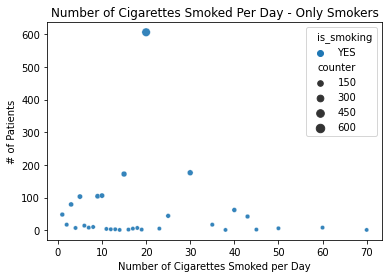

In [10]:
ax1=sns.scatterplot(x=dfsmkplt_ns.cigsPerDay, y=dfsmkplt_ns.counter, hue=dfsmkplt_ns.is_smoking, 
                size=dfsmkplt_ns.counter, alpha=0.9)
ax1.set(xlabel='Number of Cigarettes Smoked per Day', ylabel='# of Patients')
plt.title('Number of Cigarettes Smoked Per Day - Only Smokers')

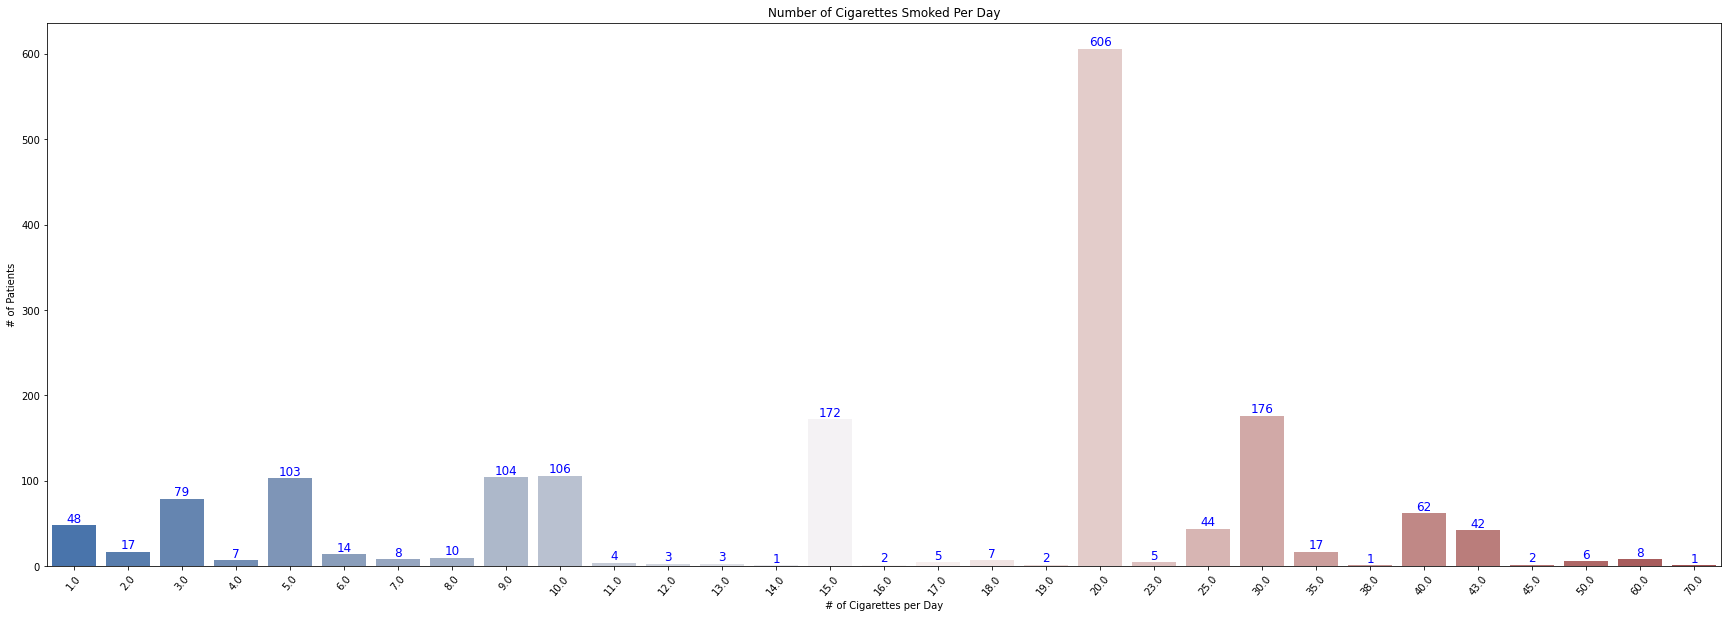

In [11]:
#Fill Null Values in Data
smkg = cardio_df[cardio_df.is_smoking=='YES']

#Create Figure 
fig, ax = plt.subplots(figsize=(30, 10))

#Create Plot
ax = sns.countplot(x='cigsPerDay', data=smkg, palette='vlag')
ax.set(xlabel='# of Cigarettes per Day', ylabel='# of Patients')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50)
plt.title('Number of Cigarettes Smoked Per Day')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')


Distribution of Cholestrol

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(250, 100, 'High BP')

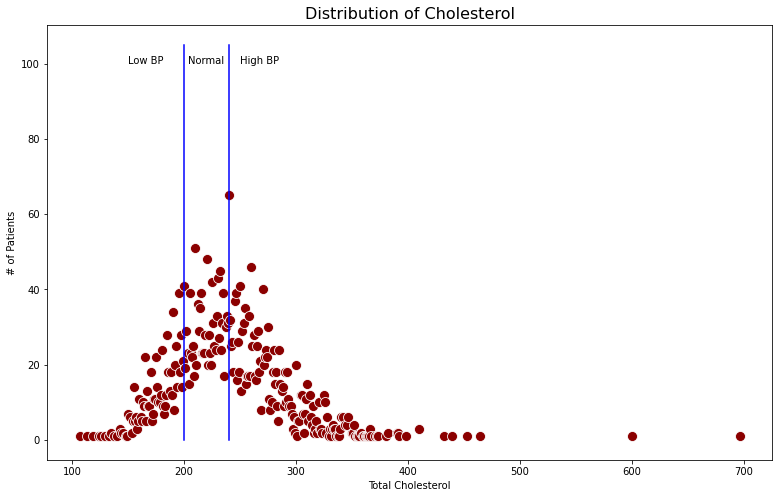

In [12]:
#Create dataframe by shorting values, including nulls, then resent index to make 2 columns
chol_counts = pd.DataFrame(cardio_df.totChol.value_counts()).reset_index()

#Rename Columns, sort by cholesterol value
chol_counts.columns = ['Cholesterol','NoPts']    
chol = chol_counts.sort_values('Cholesterol')

#Create Plot of Cholesterols
fig, ax = plt.subplots(figsize = (13, 8))
ax = sns.scatterplot('Cholesterol','NoPts', data= chol, color='darkred',s=100)
ax.set(xlabel='Total Cholesterol', ylabel='# of Patients')
plt.title('Distribution of Cholesterol',fontsize=16)

#Annotate Normal Ranges 
plt.plot([200,200],[0,105],color='blue')
ax.annotate('Low BP', xy=(150,100))
ax.annotate('Normal', xy=(203,100))
plt.plot([240,240],[0,105],color='blue')
ax.annotate('High BP', xy=(250,100))

In [13]:
#Update dataframe to include counter column for use in groupby statements
data_counter = cardio_df.copy()
data_counter['Counter']=0

Systolic BP Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(150, 110, 'High BP')

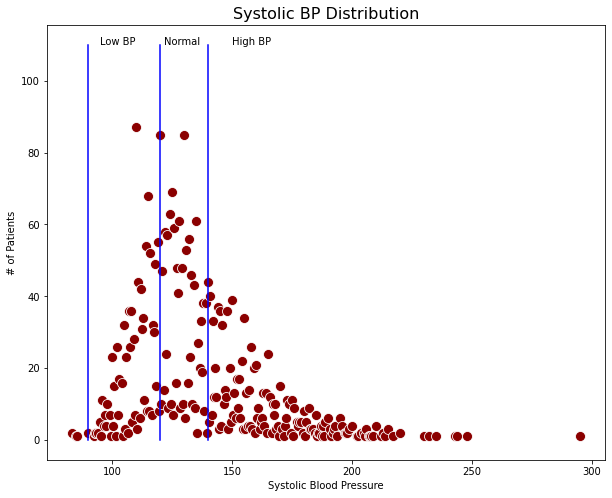

In [14]:
#Generate counter Dataframe for systolic BP
sys_counted = data_counter.groupby('sysBP').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot('sysBP','Counter', data=sys_counted, color='darkred', s=100)
ax.set(xlabel='Systolic Blood Pressure', ylabel='# of Patients')
plt.title('Systolic BP Distribution',fontsize=16)


#Annotate Normal Ranges 
plt.plot([90,90],[0,110],color='blue')
ax.annotate('Low BP', xy=(95,110))
plt.plot([120,120],[0,110],color='blue')
ax.annotate('Normal', xy=(121.5,110))
plt.plot([140,140],[0,110],color='blue')
ax.annotate('High BP', xy=(150,110))

Diastolic BP Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(50, 260, 'Low BP')

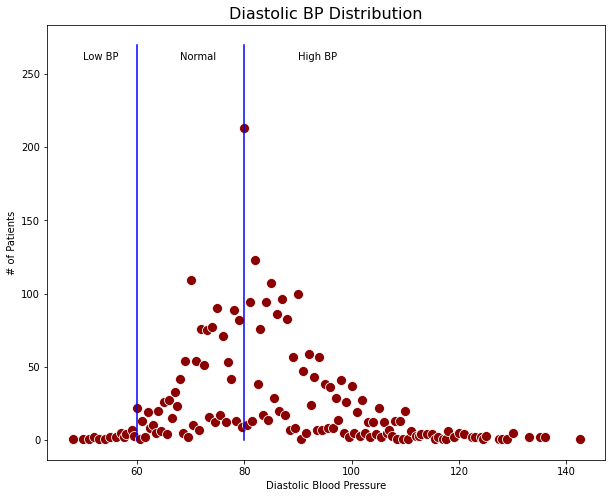

In [15]:
#Generate counter Dataframe for Diastolic BP
dia_counted = data_counter.groupby('diaBP').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot('diaBP','Counter', data= dia_counted, color='darkred',s=100)
ax.set(xlabel='Diastolic Blood Pressure', ylabel='# of Patients')
plt.title('Diastolic BP Distribution',fontsize=16)

#Annotate Normal Ranges 
plt.plot([80,80],[0,270],color='blue')
ax.annotate('Normal', xy=(68,260))
ax.annotate('High BP', xy=(90,260))
plt.plot([60,60],[0,270],color='blue')
ax.annotate('Low BP', xy=(50,260))

BMI Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(32, 450, 'Obese')

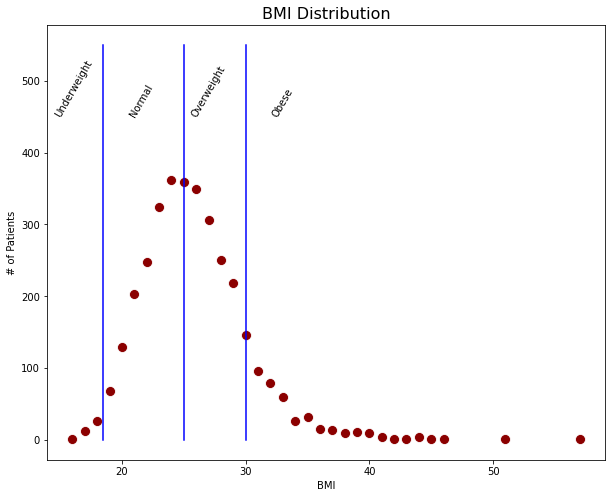

In [16]:
#Generate counter Dataframe for BMI
#Round BMI to whole number
BMI_round = data_counter.BMI.round(0)
data_BMI = data_counter.copy()
data_BMI['BMI'] = BMI_round

#Groupby to generate # of patients at each BMI
BMI_counted = data_BMI.groupby('BMI').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.scatterplot('BMI','Counter', data= BMI_counted, color='darkred',s=100)
ax.set(xlabel='BMI', ylabel='# of Patients')
plt.title('BMI Distribution',fontsize=16)


#Annotate Normal Ranges 
plt.plot([18.5,18.5],[0,550],color='blue')
ax.annotate('Underweight', xy=(14.5, 450), rotation=60)
plt.plot([25,25],[0,550],color='blue')
ax.annotate('Normal', xy=(20.5, 450), rotation=60)
plt.plot([30,30],[0,550],color='blue')
ax.annotate('Overweight', xy=(25.5, 450), rotation=60)
ax.annotate('Obese', xy=(32, 450), rotation=60)

Resting heart rate Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(73, 600, 'Normal Range')

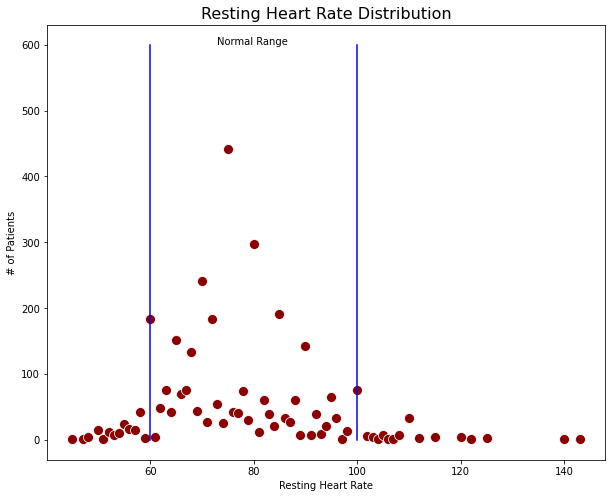

In [17]:
#Generate counter Dataframe for Resting Heart Rate
bpm = data_counter.groupby('heartRate').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot('heartRate','Counter', data= bpm, color='darkred',s=100)
ax.set(xlabel='Resting Heart Rate', ylabel='# of Patients')
plt.title('Resting Heart Rate Distribution',fontsize=16)

#Add Range annotations
plt.plot([60,60],[0,600],color='blue')
plt.plot([100,100],[0,600],color='blue')
ax.annotate('Normal Range', xy=(73,600))

Blood Glucose Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(250, 200, 'Diabetic')

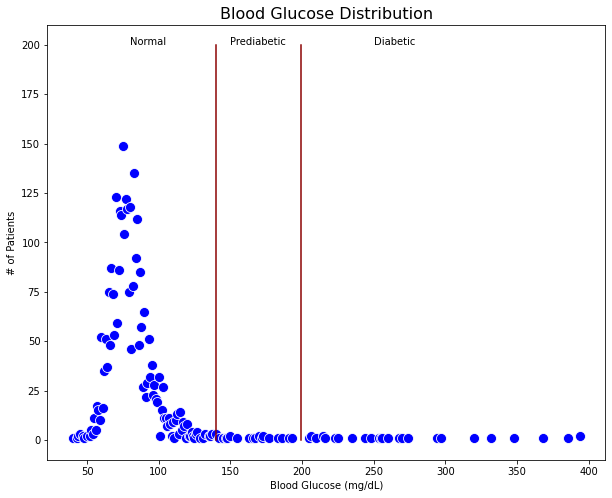

In [18]:
#Generate counter Dataframe for Blood Glucose
sugar_counted = data_counter.groupby('glucose').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot('glucose','Counter', data= sugar_counted, color='blue',s=100)
ax.set(xlabel='Blood Glucose (mg/dL)', ylabel='# of Patients')
plt.title('Blood Glucose Distribution',fontsize=16)

#Add Range annotations
plt.plot([140,140],[0,200],color='darkred')
ax.annotate('Normal',xy=(80,200))
plt.plot([199,199],[0,200],color='darkred')
ax.annotate('Prediabetic', xy=(150,200))
ax.annotate('Diabetic', xy=(250,200))

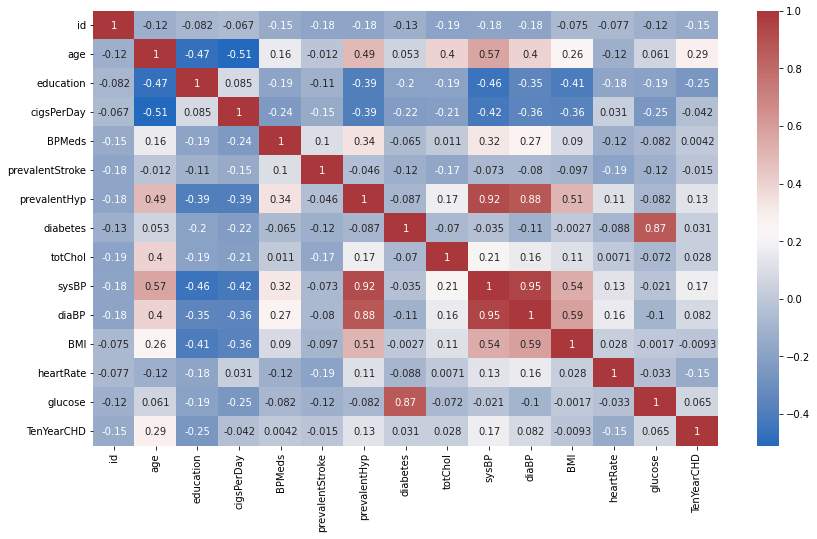

In [19]:
corr_data = cardio_df.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_data.corr(), annot=True, cmap='vlag')

Blood glucose and presence of diabetes are closely related, as are systolic and diastolic blood pressure. The strongest factor in predicting CHD is age, followed by blood pressure and consequently blood pressure medication, preexisting conditions (diabetes, stroke, obesity), and prevalence of smoking.

Cigarettes Smoked vs Risk of Developing CHD

Text(0.5, 1.0, '# Cigarettes Smoked vs Risk of Developing CHD')

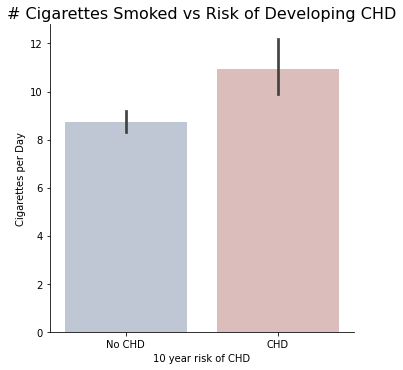

In [20]:
#Amount of cigarettes smoked affect on CHD risk 
smokingvsCHD = sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=cardio_df, palette= 'vlag')
smokingvsCHD.set(xlabel='10 year risk of CHD', ylabel='Cigarettes per Day')
smokingvsCHD.set_xticklabels(['No CHD','CHD'])
plt.title('# Cigarettes Smoked vs Risk of Developing CHD' ,fontsize=16)

Impact of Smoking on Risk of Developing CHD

Text(0.5, 1.0, 'Impact of Smoking on Risk of Developing CHD')

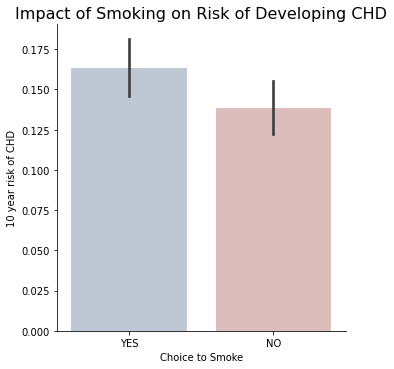

In [21]:
#Effect of smoking on risk of developing CHD
smokingvsCHD = sns.catplot(x='is_smoking',y='TenYearCHD',kind='bar',data=cardio_df, palette= 'vlag')
smokingvsCHD.set(xlabel='Choice to Smoke', ylabel='10 year risk of CHD')
plt.title('Impact of Smoking on Risk of Developing CHD' ,fontsize=16)

Risk of Developing CHD with Age

Text(0.5, 1.0, 'Risk of Developing CHD with Age')

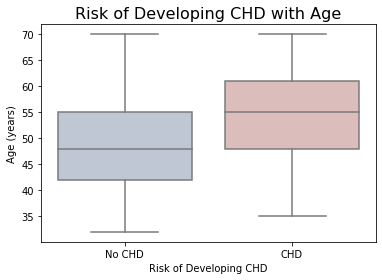

In [22]:
#Effect of age on developing CHD
age = sns.boxplot(x='TenYearCHD',y='age',data=cardio_df, palette='vlag')
age.set(xlabel='Risk of Developing CHD', ylabel='Age (years)')
age.set_xticklabels(['No CHD','CHD'])
plt.title('Risk of Developing CHD with Age' ,fontsize=16)

In [23]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, plot_confusion_matrix

#Import Modeling methods 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


Imputing the missing values

In [24]:
train_df = cardio_df.copy()

#Convert categorical data to continuous
train_df['sex'] = train_df.sex.map(dict(M = 0, F = 1)) 
train_df['is_smoking'] = train_df.is_smoking.map(dict(YES = 1, NO = 0))

#Filling Null Values

#5= education unknown
train_df.education.fillna(5, inplace=True) 
#replace unknown as median value for cigs per day
train_df.cigsPerDay.fillna(train_df.cigsPerDay.median(), inplace=True) 
#2= BP meds unknown
train_df.BPMeds.fillna(2, inplace=True) 
#replace nan as median value
train_df.totChol.fillna(train_df.totChol.median(), inplace=True) 
#replace nan as median value
train_df.BMI.fillna(train_df.BMI.median(),inplace=True ) 
#replace nan as median value
train_df.heartRate.fillna(train_df.heartRate.median(),inplace=True )
#replace nan as median value
train_df.glucose.fillna(train_df.glucose.median(),inplace=True ) 

In [25]:
#Split data into independent/dependent variables
x, y = train_df.loc[:, train_df.columns != 'TenYearCHD'], train_df['TenYearCHD']
                     
#First Split to save 20% of Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=train_df['is_smoking'], random_state=36)

In [26]:
scores = []
kf = KFold(n_splits=5, shuffle=False)

### Logistic Regression

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Accuracy: 0.8584070796460177
Best Parameter: {'tol': 0.0001, 'max_iter': 10000}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


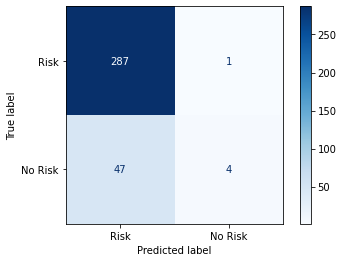

In [27]:
clf = LogisticRegression(random_state=33, warm_start=True, max_iter=1000000)
parameters = {'tol' : [0.0001, 0.001], 'max_iter': [1000, 10000, 100000, 1000000]}
rs = RandomizedSearchCV(clf, parameters, cv=kf, return_train_score=False, n_jobs=-1, verbose=10)
rs.fit(x_train, y_train)


acc_result_ = accuracy_score(rs.predict(x_test), y_test)
best_params = rs.best_params_

print("Accuracy:", acc_result_)
print("Best Parameter:", best_params)

plot_confusion_matrix(rs, x_test, y_test, cmap='Blues', display_labels=['Risk', 'No Risk'])
plt.show()

scores.append({'Model': 'Logistic Regression',
                 'Accuracy': acc_result_,
               'Best Parameter': best_params})

### Decision Tree Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Accuracy: 0.7817109144542773
Best Parameter: {'splitter': 'random', 'criterion': 'entropy'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


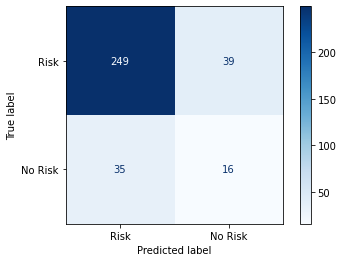

In [28]:
clf = DecisionTreeClassifier(random_state=33)
parameters = {'criterion' : ['gini', 'entropy'], 'splitter': ['best', 'random']}
rs = RandomizedSearchCV(clf, parameters, cv=kf, return_train_score=False, n_jobs=-1, verbose=10)
rs.fit(x_train, y_train)


acc_result_ = accuracy_score(rs.predict(x_test), y_test)
best_params = rs.best_params_

print("Accuracy:", acc_result_)
print("Best Parameter:", best_params)

plot_confusion_matrix(rs, x_test, y_test, cmap='Blues', display_labels=['Risk', 'No Risk'])
plt.show()

scores.append({'Model': 'Decision Tree Classifier',
                 'Accuracy': acc_result_,
               'Best Parameter': best_params})

### Random Forest Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.8584070796460177
Best Parameter: {'n_estimators': 100, 'criterion': 'entropy'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


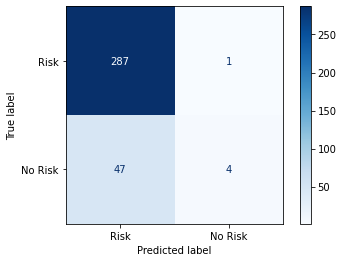

In [29]:
clf = RandomForestClassifier(random_state=33, warm_start=True)

parameters = {'n_estimators' : [100, 200, 300, 400, 500], 'criterion' : ['gini', 'entropy']}
rs = RandomizedSearchCV(clf, parameters, cv=kf, return_train_score=False, n_jobs=-1, verbose=10)
rs.fit(x_train, y_train)


acc_result_ = accuracy_score(rs.predict(x_test), y_test)
best_params = rs.best_params_

print("Accuracy:", acc_result_)
print("Best Parameter:", best_params)

plot_confusion_matrix(rs, x_test, y_test, cmap='Blues', display_labels=['Risk', 'No Risk'])
plt.show()

scores.append({'Model': 'Random Forest Classifier',
                 'Accuracy': acc_result_,
               'Best Parameter': best_params})


### SVC

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.8495575221238938
Best Parameter: {'tol': 0.0001, 'gamma': 'scale', 'C': 0.75}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


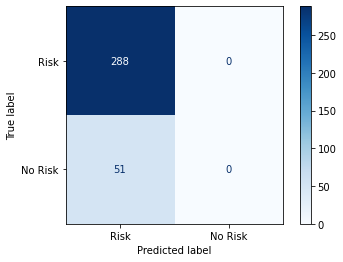

In [30]:
clf = SVC(random_state=33)

parameters = {'C' : [0.75, 1.0, 1.25], 'gamma': ['scale', 'auto'], 'tol' : [0.0001, 0.001]}
rs = RandomizedSearchCV(clf, parameters, cv=kf, return_train_score=False, n_jobs=-1, verbose=10)
rs.fit(x_train, y_train)


acc_result_ = accuracy_score(rs.predict(x_test), y_test)
best_params = rs.best_params_

print("Accuracy:", acc_result_)
print("Best Parameter:", best_params)

plot_confusion_matrix(rs, x_test, y_test, cmap='Blues', display_labels=['Risk', 'No Risk'])
plt.show()

scores.append({'Model': 'SVC',
                 'Accuracy': acc_result_,
               'Best Parameter': best_params})


### Gradient Boosting Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.8495575221238938
Best Parameter: {'n_estimators': 200, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


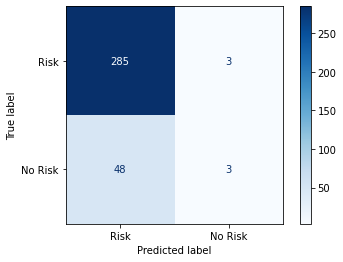

In [31]:
clf = GradientBoostingClassifier(random_state=33, warm_start=True)

parameters = {'loss': ['deviance', 'exponential'], 'learning_rate': [1.0, 0.5, 0.1], 
              'n_estimators' : [100, 200, 300, 400, 500], 'criterion': ['friedman_mse', 'squared_error']}
rs = RandomizedSearchCV(clf, parameters, cv=kf, return_train_score=False, n_jobs=-1, verbose=10)
rs.fit(x_train, y_train)


acc_result_ = accuracy_score(rs.predict(x_test), y_test)
best_params = rs.best_params_

print("Accuracy:", acc_result_)
print("Best Parameter:", best_params)

plot_confusion_matrix(rs, x_test, y_test, cmap='Blues', display_labels=['Risk', 'No Risk'])
plt.show()

scores.append({'Model': 'Gradient Boosting Classifier',
                 'Accuracy': acc_result_,
               'Best Parameter': best_params})


In [32]:
model_df = pd.DataFrame(scores, columns=['Model', 'Accuracy', 'Best Parameter'])

In [33]:
model_df

,Model,Accuracy,Best Parameter
0,Logistic Regression,0.858407,"{'tol': 0.0001, 'max_iter': 10000}"
1,Decision Tree Classifier,0.781711,"{'splitter': 'random', 'criterion': 'entropy'}"
2,Random Forest Classifier,0.858407,"{'n_estimators': 100, 'criterion': 'entropy'}"
3,SVC,0.849558,"{'tol': 0.0001, 'gamma': 'scale', 'C': 0.75}"
4,Gradient Boosting Classifier,0.849558,"{'n_estimators': 200, 'loss': 'exponential', '..."
